# EDA Lyrics (MSD 10K Subset)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


## Read Data
- MSD File
- Genius Metadata
- Genius Lyrics

In [15]:
lyrics = '../data/interim/genius_lyrics.csv'
meta = '../data/interim/genius_metadata.csv'
msd = '../data/external/MillionSongSubset/AdditionalFiles/subset_unique_tracks.txt'

df = pd.read_csv(lyrics)
df_meta = pd.read_csv(meta)
df_msd = pd.read_csv(msd, sep='<SEP>', header=None, engine='python',
                     names=['trackid', 'songid', 'artist', 'title'])

In [16]:
print(df_msd.shape)
df_msd.head()

(10000, 4)


,trackid,songid,artist,title
0,TRAAAAW128F429D538,SOMZWCG12A8C13C480,Casual,I Didn't Mean To
1,TRAAABD128F429CF47,SOCIWDW12A8C13D406,The Box Tops,Soul Deep
2,TRAAADZ128F9348C2E,SOXVLOJ12AB0189215,Sonora Santanera,Amor De Cabaret
3,TRAAAEF128F4273421,SONHOTT12A8C13493C,Adam Ant,Something Girls
4,TRAAAFD128F92F423A,SOFSOCN12A8C143F5D,Gob,Face the Ashes


In [5]:
print(df.shape)
df.head()

(6179, 2)


,msd_id,lyrics
0,TRAAAAW128F429D538,"\n\n[Verse 1]\nAlright, I might\nHave had a li..."
1,TRAAABD128F429CF47,"\n\nDarling, I don't know much\nBut I know I l..."
2,TRAAADZ128F9348C2E,\n\nSiento una pena muy honda dentro del alma\...
3,TRAAAEF128F4273421,\n\nAdam Ant/Marco Pirroni\nEvery girl is a so...
4,TRAAAFD128F92F423A,"\n\nI've just erased it's been a while, I've g..."


In [14]:
print(df_meta.shape)
print('Not NA: ', sum(df_meta.song_id.isnull() == False))
df_meta.head()

(10000, 5)
Not NA:  6179


,msd_id,song_id,song_url,artist_id,artist
0,TRAAAAW128F429D538,13078.0,https://genius.com/Casual-i-didnt-mean-to-lyrics,2904.0,Casual
1,TRAAABD128F429CF47,1633672.0,https://genius.com/The-box-tops-soul-deep-lyrics,202251.0,The Box Tops
2,TRAAADZ128F9348C2E,1048686.0,https://genius.com/La-sonora-santanera-amor-de...,367221.0,La Sonora Santanera
3,TRAAAEF128F4273421,752887.0,https://genius.com/Adam-ant-something-girls-ly...,67857.0,Adam Ant
4,TRAAAFD128F92F423A,1240187.0,https://genius.com/Gob-face-the-ashes-lyrics,273034.0,Gob


<b>Let's check to see what comprises the NAs</b>

In [20]:
df_msd2 = df_msd.merge(df_meta[['msd_id', 'song_url']], how='outer', left_on='trackid', right_on='msd_id')
df_msd2.head(30)

,trackid,songid,artist,title,msd_id,song_url
0,TRAAAAW128F429D538,SOMZWCG12A8C13C480,Casual,I Didn't Mean To,TRAAAAW128F429D538,https://genius.com/Casual-i-didnt-mean-to-lyrics
1,TRAAABD128F429CF47,SOCIWDW12A8C13D406,The Box Tops,Soul Deep,TRAAABD128F429CF47,https://genius.com/The-box-tops-soul-deep-lyrics
2,TRAAADZ128F9348C2E,SOXVLOJ12AB0189215,Sonora Santanera,Amor De Cabaret,TRAAADZ128F9348C2E,https://genius.com/La-sonora-santanera-amor-de...
3,TRAAAEF128F4273421,SONHOTT12A8C13493C,Adam Ant,Something Girls,TRAAAEF128F4273421,https://genius.com/Adam-ant-something-girls-ly...
4,TRAAAFD128F92F423A,SOFSOCN12A8C143F5D,Gob,Face the Ashes,TRAAAFD128F92F423A,https://genius.com/Gob-face-the-ashes-lyrics
5,TRAAAMO128F1481E7F,SOYMRWW12A6D4FAB14,Jeff And Sheri Easter,The Moon And I (Ordinary Day Album Version),TRAAAMO128F1481E7F,NaN
6,TRAAAMQ128F1460CD3,SOMJBYD12A6D4F8557,Rated R,Keepin It Real (Skit),TRAAAMQ128F1460CD3,https://genius.com/Tru-run-away-slaves-lyrics
7,TRAAAPK128E0786D96,SOHKNRJ12A6701D1F8,Tweeterfriendly Music,Drop of Rain,TRAAAPK128E0786D96,NaN
8,TRAAARJ128F9320760,SOIAZJW12AB01853F1,Planet P Project,Pink World,TRAAARJ128F9320760,https://genius.com/Planet-p-project-pink-world...
9,TRAAAVG12903CFA543,SOUDSGM12AC9618304,Clp,Insatiable (Instrumental Version),TRAAAVG12903CFA543,https://genius.com/Clp-insatiable-lyrics


<b>Descriptive Statistics</b>

In [22]:
df.describe()

,msd_id,lyrics
count,6179,6179
unique,6179,5813
top,TRALOUF128F422F329,\n\nInstrumental\n\n
freq,1,45


In [23]:
df_msd.describe()

,trackid,songid,artist,title
count,10000,10000,10000,9999
unique,10000,10000,4412,9708
top,TRABIZY128F933C696,SOSKXTH12A8C13495D,Mario Rosenstock,Intro
freq,1,1,13,14


In [33]:
df_meta.describe(include='all')

,msd_id,song_id,song_url,artist_id,artist
count,10000,6.179000e+03,6179,6.179000e+03,6179
unique,10000,NaN,5911,NaN,3143
top,TRABIZY128F933C696,NaN,https://genius.com/Marcel-proust-names-of-peop...,NaN,Marcel Proust
freq,1,NaN,20,NaN,60
mean,NaN,1.284097e+06,NaN,2.145900e+05,NaN
std,NaN,9.785592e+05,NaN,2.718068e+05,NaN
min,NaN,1.900000e+01,NaN,1.000000e+00,NaN
25%,NaN,4.582180e+05,NaN,1.453450e+04,NaN
50%,NaN,1.163349e+06,NaN,1.048030e+05,NaN
75%,NaN,1.754770e+06,NaN,3.559110e+05,NaN


Length of scraped lyrics

In [46]:
df.lyrics.str.len().describe(percentiles=[.25, .75, .9, .95, .97, .99])

count      6179.000000
mean       8670.890759
std       61191.575912
min          11.000000
25%         827.000000
50%        1287.000000
75%        2547.500000
90%        4287.200000
95%       10629.800000
97%       22925.000000
99%      124920.560000
max      825045.000000
Name: lyrics, dtype: float64

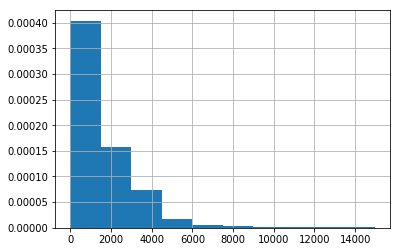

In [53]:
df.lyrics[df.lyrics.str.len() < 15000].str.len().hist(density=True)

In [95]:
df[(df.lyrics.str.len() > 2500) & (df.lyrics.str.len() < 4500)]

,msd_id,lyrics
5,TRAAAMQ128F1460CD3,\n\n[Voice in Background]\nLook at the little ...
7,TRAAAVG12903CFA543,\n\nOh shit this chick is back and I'm freakin...
30,TRAADYI128E078FB38,\n\n(Chorus: Mr. Cheeks)\nAll my ladies and me...
34,TRAAEOU128F9309DE0,\n\n[Verse 1]\nTeorija zavere u lobanji jednog...
40,TRAAFSM128F425A2C5,\n\n[Verse 1]\nI won't be told anymore\nThat I...
43,TRAAGCZ128F93210FD,\n\n[Intro: Fergie & apl.de.ap]\nLet's get it ...
54,TRAAGVM128E0784D95,"\n\n[Instrumental Intro]\n\nYeah, a lot of cat..."
57,TRAAHER128F92E3FE9,"\n\n[Intro]\n\n[Verse 1: Richie Cunning, Grip ..."
61,TRAAHZP12903CA25F4,"\n\n[Pharoahe Monche]\nRecognize me nigga, loo..."
75,TRAAJJA12903CC518A,\n\nIntro:\nYo Saafir what's goin' on playboy?...


In [108]:
df_msd2[df_msd2.trackid == 'TRBIFUD128F1495AE2']

,trackid,songid,artist,title,msd_id,song_url
9954,TRBIFUD128F1495AE2,SOIDEZW12A6D4F9655,Hot Boys,Young Riders,TRBIFUD128F1495AE2,https://genius.com/Hot-boys-young-riders-lyrics


In [109]:
df_meta[df_meta.msd_id == 'TRBIFUD128F1495AE2'].song_url.values

array(['https://genius.com/Hot-boys-young-riders-lyrics'], dtype=object)